In [100]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [104]:
import os
import yaml
import pandas as pd

# Function to load configuration file
def load_config(config_file='config.yaml'):
    with open(config_file, 'r') as file:
        config = yaml.safe_load(file)
    return config


config=load_config()

ideal_data_path = config['ideal_data_path']
non_ideal_data_path = config['non_ideal_data_path']
ideal_harmonic_data_path = config['ideal_harmonic_data_path']
non_ideal_harmonic_data_path = config['non_ideal_harmonic_data_path']

In [101]:
os.getcwd()

'/content'

In [106]:
ideal_harmonics_df.to_excel(ideal_harmonic_data_path, index=False)

non_ideal_harmonics_df.to_excel(non_ideal_harmonic_data_path, index=False)

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

ideal=pd.read_excel(ideal_data_path)
nonideal=pd.read_excel(non_ideal_data_path)

## Loading all sheets from both excel files in a dictionary

ideals=pd.read_excel(ideal_data_path, sheet_name=None)
nonIdeals=pd.read_excel(non_ideal_data_path,sheet_name=None)

Since, each excel file has many sheets inside it which includes performance of motor under different scenarios. First, we will see what are those different scenarios.

In [110]:
ideals.keys()

dict_keys(['reference machine', 'Type-1 variation A', 'Type-1 variation B', 'Low temperature', 'High temperature', 'Type-1 variation C', 'Pure Sine'])

In [111]:
nonIdeals.keys()

dict_keys(['polarity issue', 'Type-1 variation C', 'Type-1 variation D', 'Type-2 variation A', 'Type-2 variation D', 'Type-2 variation E', 'Core fault-1', 'Core fault-2', 'Extreme low temperature', 'Extreme high temperature'])

Here, keys of the dictionaries(ideal and nonIdeal) are Sheet names from the provided excel sheet. I am mapping these diferent scenarios/conditions(as keys) with integer in 2 new dictionaries so that users can easily input.

In [112]:
ideal_sheets = {index: key for index, key in enumerate(ideals.keys())}
nonIdeal_sheets = {index: key for index, key in enumerate(nonIdeals.keys())}

In [113]:
ideal_sheets

{0: 'reference machine',
 1: 'Type-1 variation A',
 2: 'Type-1 variation B',
 3: 'Low temperature',
 4: 'High temperature',
 5: 'Type-1 variation C',
 6: 'Pure Sine'}

In [114]:
nonIdeal_sheets

{0: 'polarity issue',
 1: 'Type-1 variation C',
 2: 'Type-1 variation D',
 3: 'Type-2 variation A',
 4: 'Type-2 variation D',
 5: 'Type-2 variation E',
 6: 'Core fault-1',
 7: 'Core fault-2',
 8: 'Extreme low temperature',
 9: 'Extreme high temperature'}

In [115]:
ideals[ideal_sheets[1]].head()

,Relative Time,Ph1,Ph2,Ph3
0,0.000000,-0.001314,0.000658,0.000656
1,0.000093,0.027638,-0.859082,0.831192
2,0.000185,0.082676,-0.863854,0.780015
3,0.000278,0.139903,-0.881180,0.738673
4,0.000370,0.213574,-0.938571,0.722062


In [116]:
nonIdeals[nonIdeal_sheets[3]].head(3)

,Relative Time,Ph1,Ph2,Ph3
0,0.000000,-0.001327,0.000665,0.000663
1,0.000093,0.028781,-0.878717,0.849859
2,0.000185,0.089587,-0.871713,0.780944


In [117]:
ideals[ideal_sheets[1]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Relative Time  362 non-null    float64
 1   Ph1            362 non-null    float64
 2   Ph2            362 non-null    float64
 3   Ph3            362 non-null    float64
dtypes: float64(4)
memory usage: 11.4 KB


Function to plot motor behavior under a particular scenario as index, motor_type(Ideal or non-Ideal) and phase(int) as mentioned by user.

In [118]:
import matplotlib.pyplot as plt
import random
import numpy as np

def plot_motor_behavior(motor_type, indices, phase):
    """
    Plots the behavior of motors based on user inputs for motor type, conditions, and phase.

    Parameters:
    motor_type (int): 1 for IDEAL, 2 for NON-IDEAL, 3 for BOTH.
    indices (DataFrame): DataFrame containing 'ideal_conditions' and 'nonIdeal_conditions'.
    phase (int): Phase to compare (1, 2, or 3).

    Returns:
    None: Displays the plot or returns an error message if invalid input.
    """

    # Function to plot data for given conditions
    def plot_conditions(conditions, motor_type_label, motor_sheets, motor_data, phase):
        for index in conditions:
            sheet_name = motor_sheets[index]
            df = motor_data[sheet_name]
            color = np.random.rand(3,)  # Random color for each plot line
            plt.plot(df['Relative Time'], df.iloc[:, phase], label=f"{motor_type_label} Motor - {sheet_name}", color=color)

    # Start plotting based on motor type
    plt.figure(figsize=(15, 7.5))

    if motor_type == 1:  # IDEAL motor
        conditions = indices['ideal_conditions'].dropna().tolist()
        plot_conditions(conditions, 'Ideal', ideal_sheets, ideals, phase)
        plt.title(f"Phase {phase} Comparison for Ideal Motor")

    elif motor_type == 2:  # NON-IDEAL motor
        conditions = indices['nonIdeal_conditions'].dropna().tolist()
        plot_conditions(conditions, 'Non-Ideal', nonIdeal_sheets, nonIdeals, phase)
        plt.title(f"Phase {phase} Comparison for Non-Ideal Motor")

    elif motor_type == 3:  # BOTH motors
        ideal_conditions = indices['ideal_conditions'].dropna().tolist()
        non_ideal_conditions = indices['nonIdeal_conditions'].dropna().tolist()

        if len(ideal_conditions) > 0:
            plot_conditions(ideal_conditions, 'Ideal', ideal_sheets, ideals, phase)
        if len(non_ideal_conditions) > 0:
            plot_conditions(non_ideal_conditions, 'Non-Ideal', nonIdeal_sheets, nonIdeals, phase)

        plt.title(f"Phase {phase} Comparison for Ideal and Non-Ideal Motors")

    plt.xlabel('Relative Time')
    plt.ylabel(f'Phase {phase} Values')
    plt.legend()
    plt.grid(True)
    plt.show()


Choose motor type:
1. IDEAL
2. NON-IDEAL
3. BOTH (Ideal vs Non-Ideal)
Enter the number corresponding to the motor type: 1
IDEAL Motor Sheets:
{0: 'reference machine', 1: 'Type-1 variation A', 2: 'Type-1 variation B', 3: 'Low temperature', 4: 'High temperature', 5: 'Type-1 variation C', 6: 'Pure Sine'}
Enter the total number of conditions you want to plot: 1
Enter 'i' for IDEAL or 'n' for NON-IDEAL for condition 1: i
Enter the IDEAL sheet index 1: 1
Enter the phase (1, 2, or 3): 1


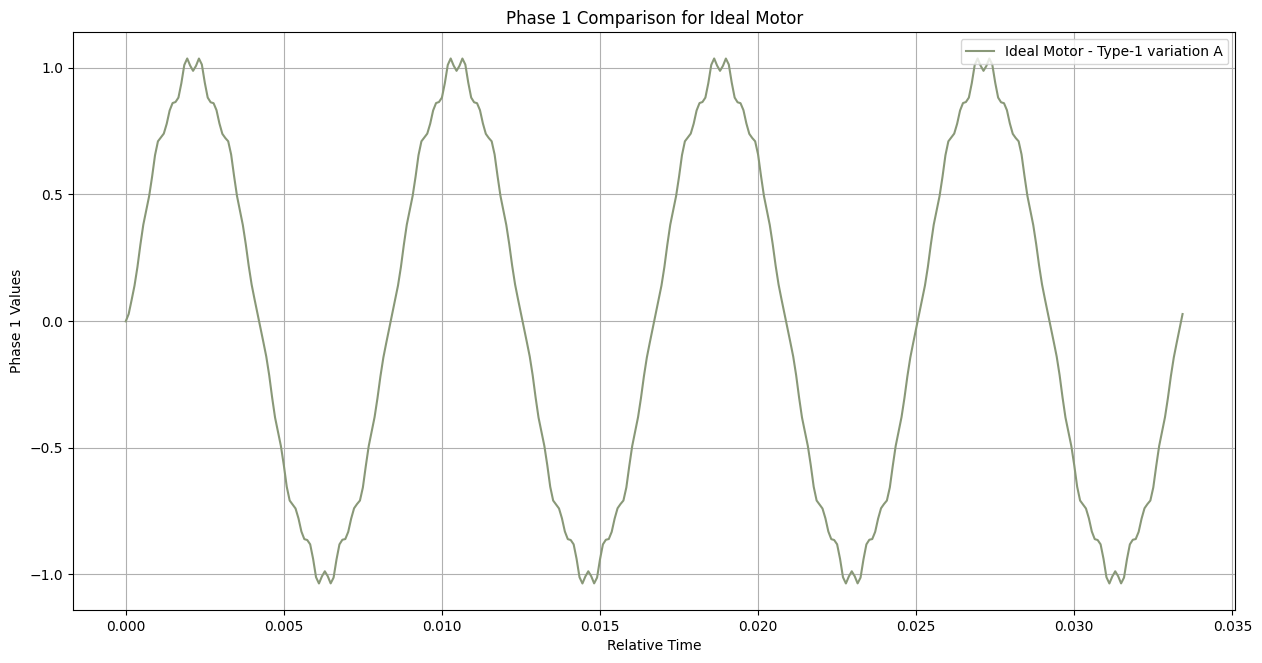

In [119]:
def user_input():
    print("Choose motor type:")
    print("1. IDEAL")
    print("2. NON-IDEAL")
    print("3. BOTH (Ideal vs Non-Ideal)")

    # Validating motor_type input
    while True:
        motor_type = input("Enter the number corresponding to the motor type: ")
        if motor_type in ['1', '2', '3']:
            motor_type = int(motor_type)
            break
        else:
            print("Invalid motor type. Please choose '1' for IDEAL, '2' for NON-IDEAL, or '3' for BOTH.")

    # Displaying relevant sheets based on motor type
    if motor_type == 1:
        print("IDEAL Motor Sheets:")
        print(ideal_sheets)
    elif motor_type == 2:
        print("NON-IDEAL Motor Sheets:")
        print(nonIdeal_sheets)
    elif motor_type == 3:
        print("IDEAL Motor Sheets:")
        print(ideal_sheets)
        print("NON-IDEAL Motor Sheets:")
        print(nonIdeal_sheets)

    # Asking for the number of conditions to plot
    total_conditions = int(input("Enter the total number of conditions you want to plot: "))

    # Initialize lists to store ideal and non-ideal conditions
    ideal_conditions = []
    nonIdeal_conditions = []

    for i in range(total_conditions):
        # Asking for conditions, allowing users to switch between Ideal and Non-Ideal
        condition_type = input(f"Enter 'i' for IDEAL or 'n' for NON-IDEAL for condition {i+1}: ").lower()

        if condition_type == 'i':
            index = int(input(f"Enter the IDEAL sheet index {i+1}: "))
            ideal_conditions.append(index)
        elif condition_type == 'n':
            index = int(input(f"Enter the NON-IDEAL sheet index {i+1}: "))
            nonIdeal_conditions.append(index)
        else:
            print("Invalid choice. Please enter 'i' for IDEAL or 'n' for NON-IDEAL.")
            i -= 1  # Retry this iteration

    # Construct DataFrame using pd.Series to handle unequal lengths
    conditions_df = pd.DataFrame({
        'ideal_conditions': pd.Series(ideal_conditions),
        'nonIdeal_conditions': pd.Series(nonIdeal_conditions)
    })

    # Input for phase and validation
    while True:
        phase = input("Enter the phase (1, 2, or 3): ")
        if phase in ['1', '2', '3']:
            phase = int(phase)
            break
        else:
            print("Invalid phase. Please choose 1, 2, or 3.")

    return motor_type, conditions_df, phase


def main():
    motor_type, conditions_df, phase = user_input()
    plot_motor_behavior(motor_type, conditions_df, phase)

main()


**Decomposing TIME-DOMAIN Data to FREQUENCY-DOMAIN Data**

Select motor type: 
1. Ideal
2. Non-Ideal
Enter choice: 1
Ideal Motor Sheets:
1. reference machine
2. Type-1 variation A
3. Type-1 variation B
4. Low temperature
5. High temperature
6. Type-1 variation C
7. Pure Sine
Enter the number corresponding to the sheet you want to select: 2
Enter the phase to analyze (1 for U, 2 for V, or 3 for W): 3


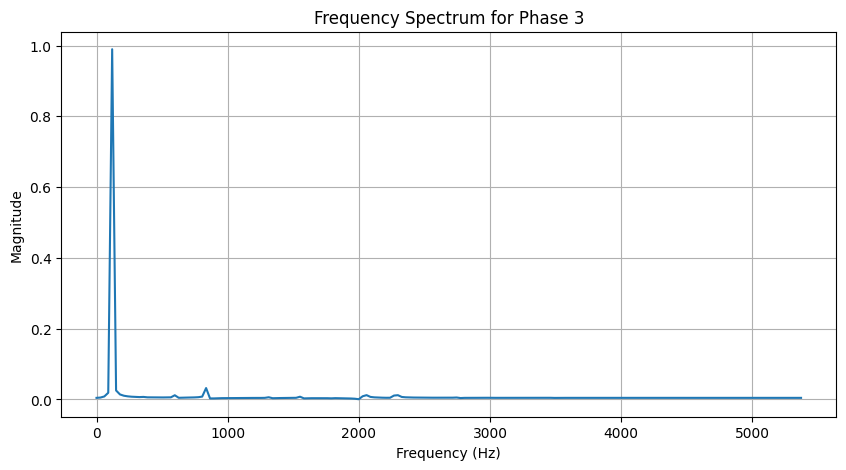

Top 5 key frequencies and magnitudes:
Frequency: 119.34 Hz, Magnitude: 0.99
Frequency: 835.36 Hz, Magnitude: 0.03
Frequency: 149.17 Hz, Magnitude: 0.03
Frequency: 89.50 Hz, Magnitude: 0.02
Frequency: 179.01 Hz, Magnitude: 0.01


In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def get_user_input():
    """
    Get the necessary input parameters from the user, except for sampling rate which will be calculated dynamically.
    """
    # Asking the user to choose between Ideal and Non-Ideal motor data
    motor_type = int(input("Select motor type: \n1. Ideal\n2. Non-Ideal\nEnter choice: "))

    # Validate motor_type input
    if motor_type not in [1, 2]:
        print("Invalid choice. Please choose either 1 or 2.")
        return get_user_input()

    # Based on motor type, either display Ideal or Non-Ideal sheets
    if motor_type == 1:
        sheets = list(ideals.keys())
        print("Ideal Motor Sheets:")
    else:
        sheets = list(nonIdeals.keys())
        print("Non-Ideal Motor Sheets:")

    # Listing available sheets and letting the user select a sheet
    for idx, sheet in enumerate(sheets):
        print(f"{idx + 1}. {sheet}")

    sheet_number = int(input("Enter the number corresponding to the sheet you want to select: ")) - 1
    selected_sheet = sheets[sheet_number]

    # Asking the user to select the phase as an integer
    phase = int(input("Enter the phase to analyze (1 for U, 2 for V, or 3 for W): "))
    if phase not in [1, 2, 3]:
        print("Invalid phase. Please choose 1, 2, or 3.")
        return get_user_input()

    # Returning selected parameters (without sampling rate)
    return motor_type, selected_sheet, phase

def calculate_sampling_rate(time_column):
    """
    Calculate the sampling rate from the time data.
    :param time_column: The column containing time values (Relative Time).
    :return: Sampling rate in Hz.
    """
    time_diffs = np.diff(time_column)  # Calculate differences between consecutive time points
    avg_time_step = np.mean(time_diffs)  # Average time difference
    sampling_rate = 1.0 / avg_time_step  # Sampling rate is the inverse of the average time difference
    return sampling_rate

def decompose_to_frequency(df, phase_column, sampling_rate):
    """
    Decompose the time-domain data from the selected phase to the frequency domain using FFT.
    :param df: DataFrame containing time-domain data (from the selected sheet).
    :param phase_column: The selected phase column (U, V, or W) from the DataFrame.
    :param sampling_rate: Sampling rate in Hz (calculated dynamically from the data).
    """
    N = len(phase_column)  # Length of the signal
    phase_column_np = phase_column.to_numpy().astype(np.float64)
    yf = fft(phase_column_np)  # FFT on the time-domain signal
    xf = fftfreq(N, 1 / sampling_rate)  # Frequency bins

    # Considering only positive frequencies
    xf = xf[:N // 2]
    yf = 2.0 / N * np.abs(yf[:N // 2])  # Magnitude of FFT

    return xf, yf

def plot_frequency_spectrum(xf, yf, phase):
    """
    Plot the frequency spectrum of the selected phase.
    :param xf: Frequency values (FFT frequencies).
    :param yf: Magnitudes of the FFT.
    :param phase: Motor phase (1, 2, or 3).
    """
    plt.figure(figsize=(10, 5))
    plt.plot(xf, yf)
    plt.title(f"Frequency Spectrum for Phase {phase}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

def identify_key_frequencies(xf, yf, num_freqs=5):
    """
    Identify the most significant frequencies in the spectrum.
    :param xf: Frequency values (FFT frequencies).
    :param yf: Magnitudes of the FFT.
    :param num_freqs: Number of key frequencies to identify.
    :return: List of key frequencies and their corresponding magnitudes.
    """
    # Sorting frequencies by magnitude in descending order
    key_freq_indices = np.argsort(yf)[-num_freqs:][::-1]
    key_frequencies = xf[key_freq_indices]
    key_magnitudes = yf[key_freq_indices]

    print(f"Top {num_freqs} key frequencies and magnitudes:")
    for freq, mag in zip(key_frequencies, key_magnitudes):
        print(f"Frequency: {freq:.2f} Hz, Magnitude: {mag:.2f}")

    return key_frequencies, key_magnitudes

def main():
    # Get user input for parameters (motor type, sheet, and phase as integer)
    motor_type, selected_sheet, phase = get_user_input()

    # Load the corresponding DataFrame based on motor type
    if motor_type == 1:
        df = ideals[selected_sheet]
    else:
        df = nonIdeals[selected_sheet]

    # Calculate the sampling rate from the 'Relative Time' column
    time_column = df['Relative Time']
    sampling_rate = calculate_sampling_rate(time_column)

    # Select the phase column based on user input
    phase_column = df.iloc[:, phase]

    # Decompose the selected phase's time-domain data to frequency domain
    xf, yf = decompose_to_frequency(df, phase_column, sampling_rate)

    # Plot the frequency spectrum
    plot_frequency_spectrum(xf, yf, phase)

    # Identify the top 5 key frequencies
    identify_key_frequencies(xf, yf)

# Execute the main function
main()


PLOTTING HARMONICS(PEAKS MARKED).

In [121]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq

# Function to calculate sampling rate dynamically based on time intervals
def calculate_sampling_rate(df):
    time_column = df['Relative Time'].to_numpy()
    time_diffs = np.diff(time_column)  # Calculate differences between consecutive time points
    avg_time_diff = np.mean(time_diffs)  # Get the average time difference
    sampling_rate = 1 / avg_time_diff  # Sampling rate is the reciprocal of the time difference
    return sampling_rate

def decompose_to_frequency(df, phase_column, sampling_rate):
    """
    Perform FFT on the signal and return the positive frequency components and corresponding magnitudes.
    """
    # Extract the signal for the given phase
    signal = df.iloc[:, phase_column].values  # Access the values using .values

    # Convert signal to a contiguous array with the correct data type
    signal = np.ascontiguousarray(signal, dtype=np.float64)

    N = len(signal)  # Length of the signal
    yf = fft(signal)  # FFT on the time-domain signal
    xf = fftfreq(N, 1 / sampling_rate)  # Frequency bins

    # Only take the positive frequencies and magnitudes
    harmonic_data = pd.DataFrame({
        'Frequency (Hz)': xf[:N // 2],  # Positive frequencies
        'Magnitude': 2.0 / N * np.abs(yf[:N // 2])  # Positive magnitudes
    })

    # Find the fundamental frequency (the frequency with the maximum magnitude)
    fundamental_frequency_idx = harmonic_data['Magnitude'].idxmax()
    fundamental_frequency = harmonic_data['Frequency (Hz)'][fundamental_frequency_idx]

    # Create harmonic levels based on the fundamental frequency
    harmonic_levels = [fundamental_frequency * (i + 1) for i in range(19)]  # 1st to 19th harmonics
    harmonic_data['Harmonic'] = np.round(harmonic_data['Frequency (Hz)'] / fundamental_frequency)

    return harmonic_data, fundamental_frequency_idx, harmonic_levels

# Function to calculate harmonics and return data for plotting
def calculate_harmonics_for_plotting(ideals, nonIdeals, phase):
    results = []

    for motor_name, motor_type in [("Ideal", ideals), ("Non-Ideal", nonIdeals)]:
        for sheet_name, df in motor_type.items():
            # Calculate the sampling rate dynamically
            sampling_rate = calculate_sampling_rate(df)

            # Decompose to frequency
            harmonic_data, fundamental_frequency_idx, harmonic_levels = decompose_to_frequency(df, phase, sampling_rate)

            # Store results
            results.append({
                'Motor Type': motor_name,
                'Sheet Name': sheet_name,
                'Harmonic Data': harmonic_data,
                'Fundamental Frequency Index': fundamental_frequency_idx,
                'Harmonic Levels': harmonic_levels
            })

    return results


# results = calculate_harmonics_for_plotting(ideals, nonIdeals, phase)


Enter the phase (1, 2, or 3): 1
Plotting for Ideal Motor - reference machine...


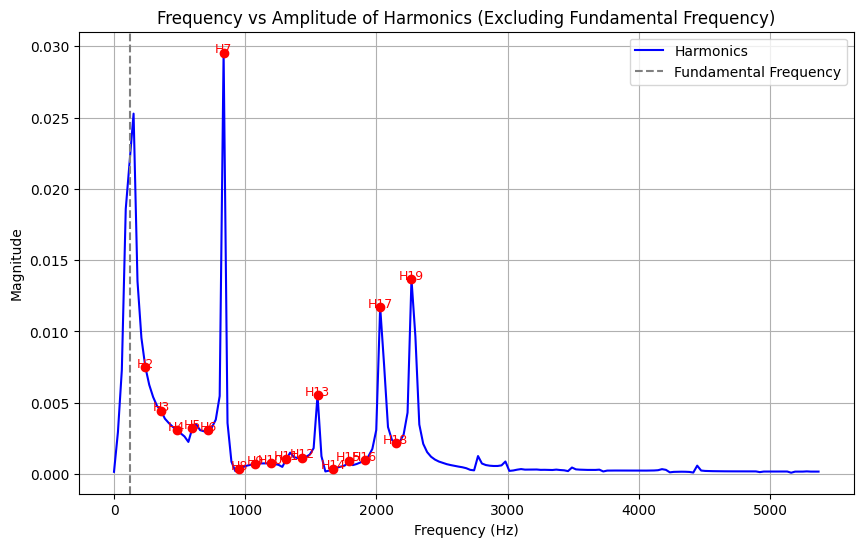

Plotting for Ideal Motor - Type-1 variation A...


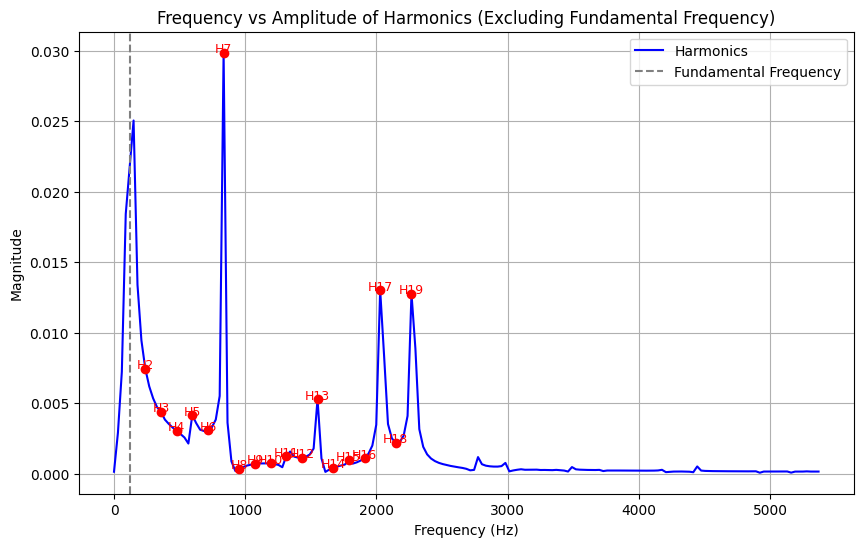

Plotting for Ideal Motor - Type-1 variation B...


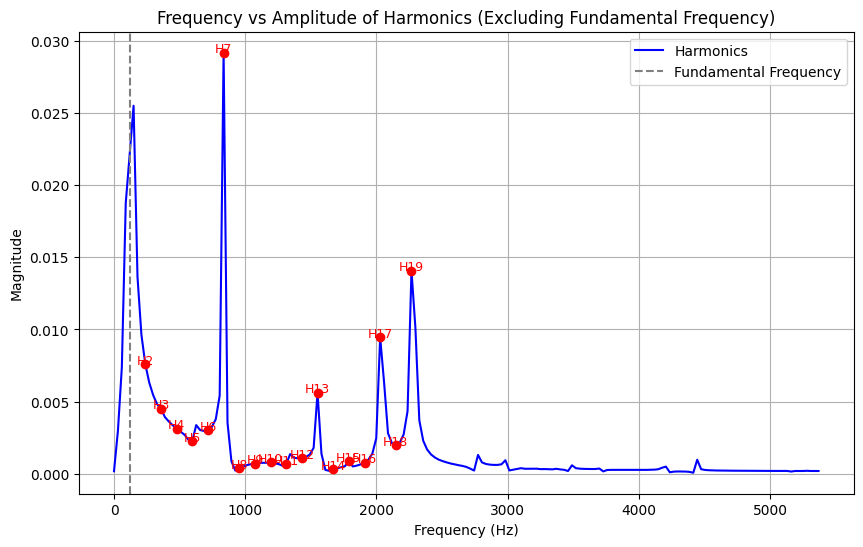

Plotting for Ideal Motor - Low temperature...


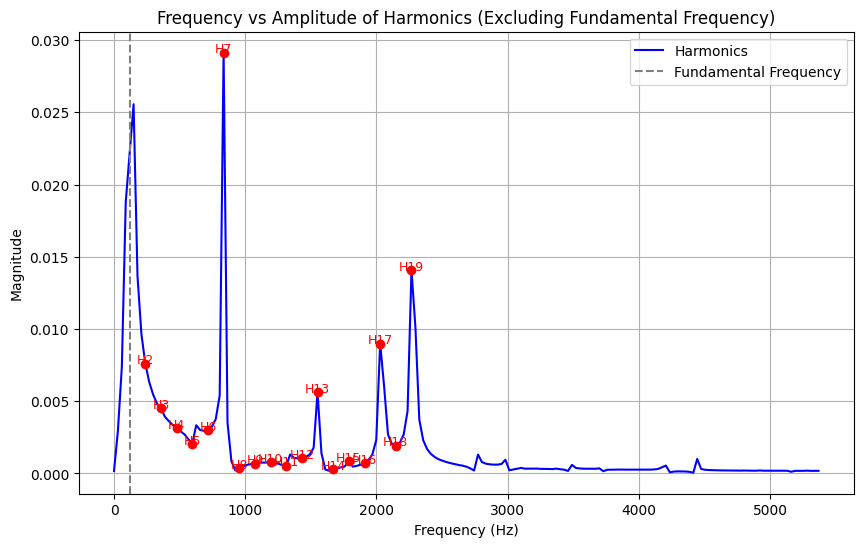

Plotting for Ideal Motor - High temperature...


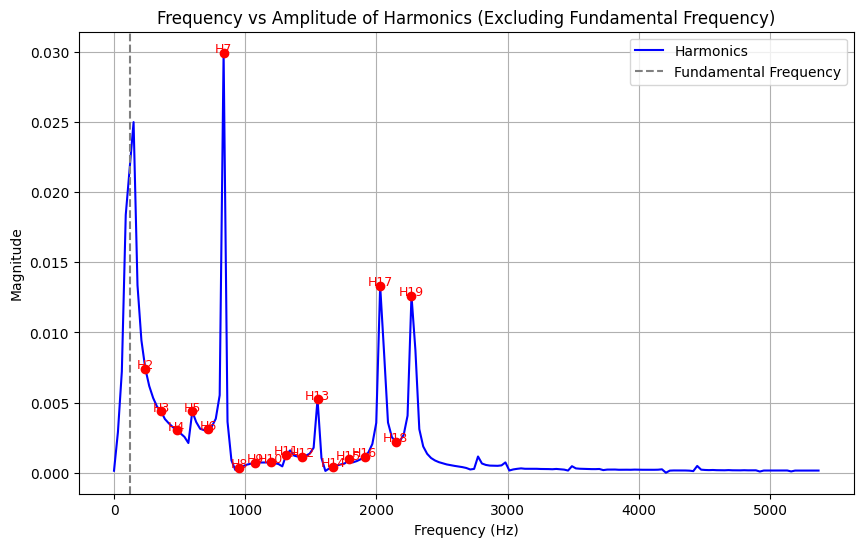

Plotting for Ideal Motor - Type-1 variation C...


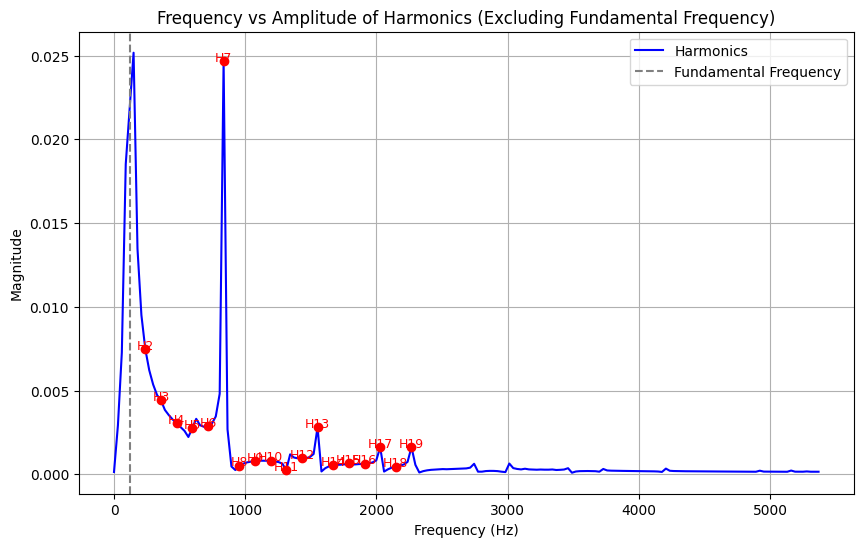

Plotting for Ideal Motor - Pure Sine...


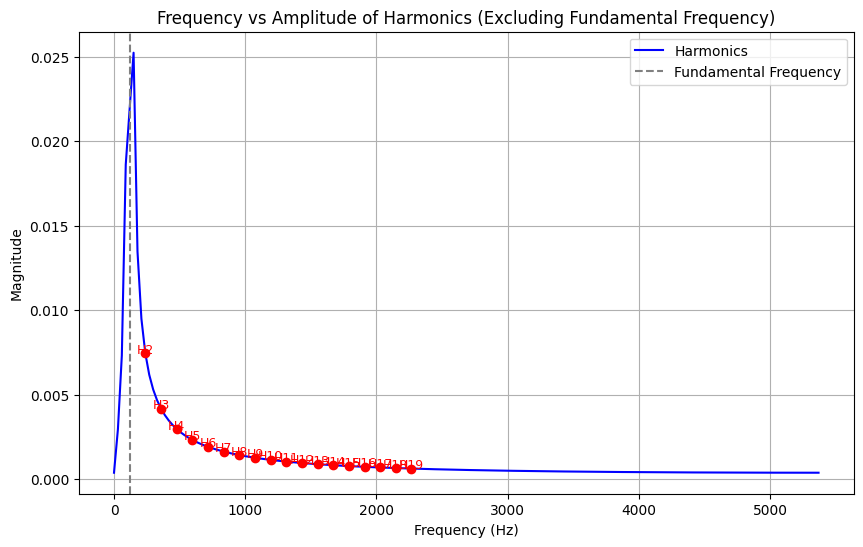

Plotting for Non-Ideal Motor - polarity issue...


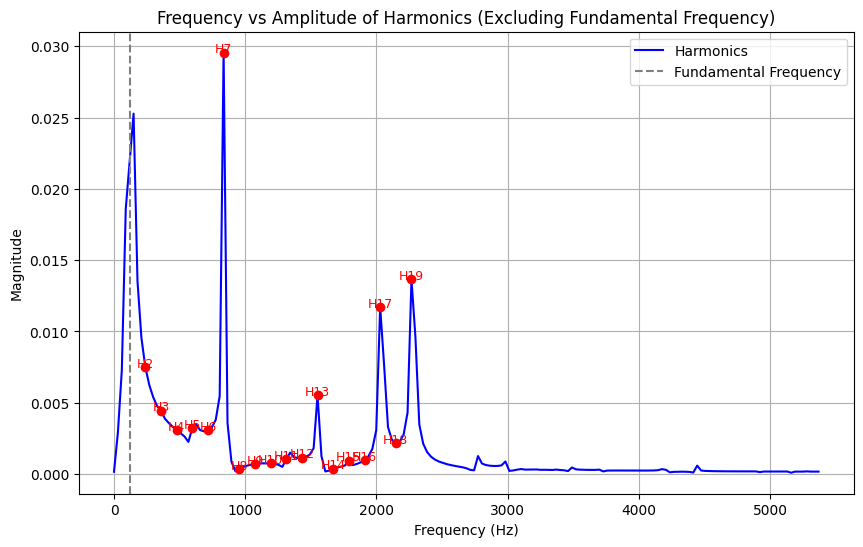

Plotting for Non-Ideal Motor - Type-1 variation C...


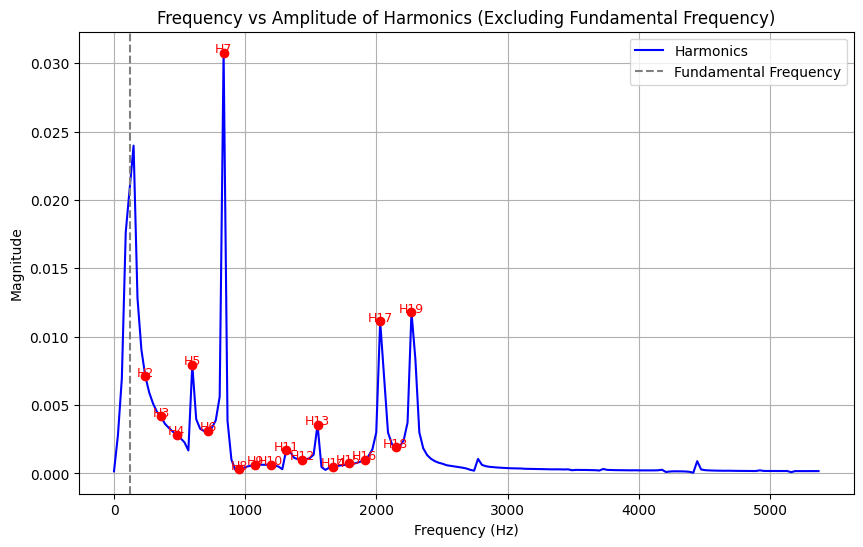

Plotting for Non-Ideal Motor - Type-1 variation D...


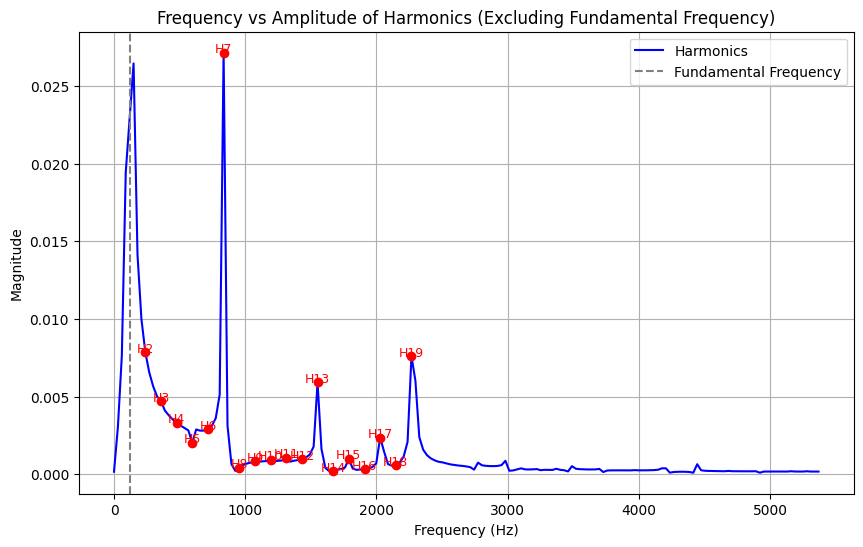

Plotting for Non-Ideal Motor - Type-2 variation A...


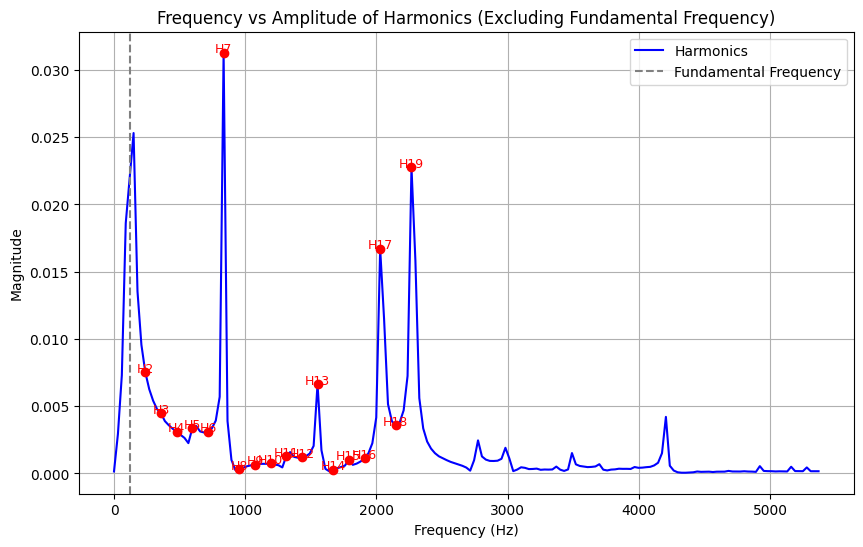

Plotting for Non-Ideal Motor - Type-2 variation D...


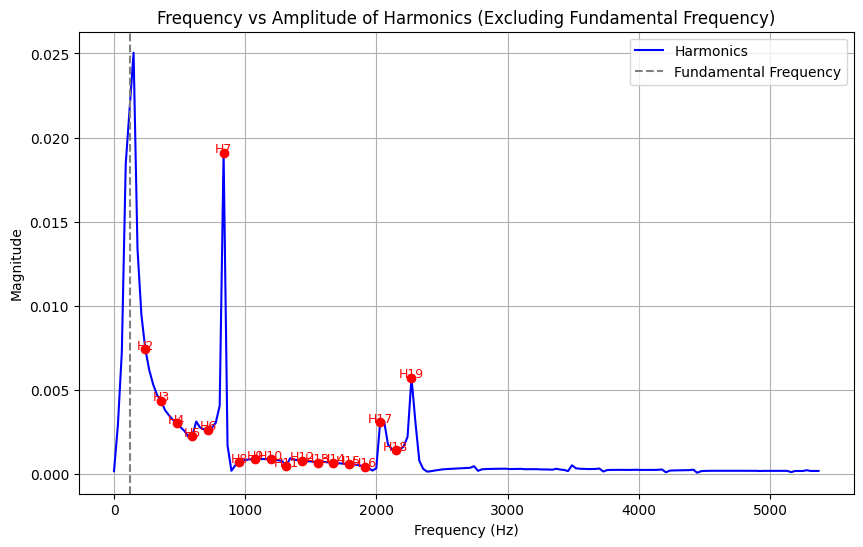

Plotting for Non-Ideal Motor - Type-2 variation E...


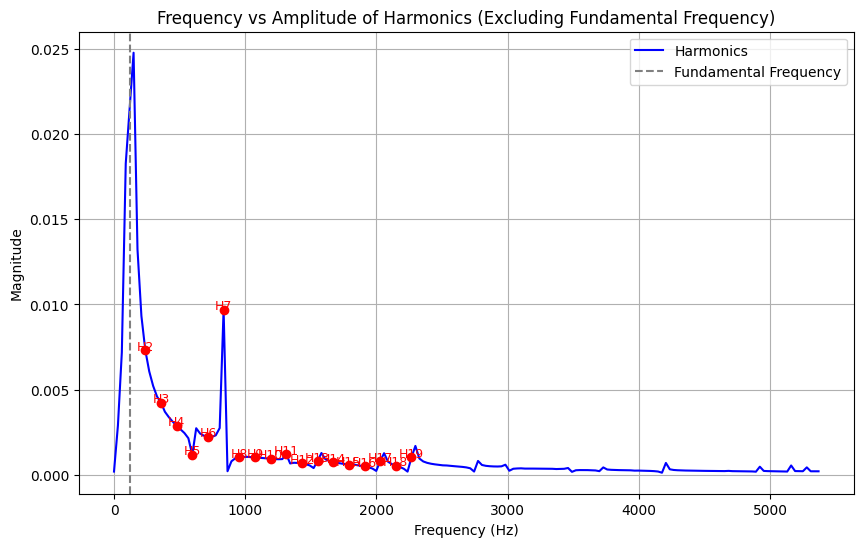

Plotting for Non-Ideal Motor - Core fault-1...


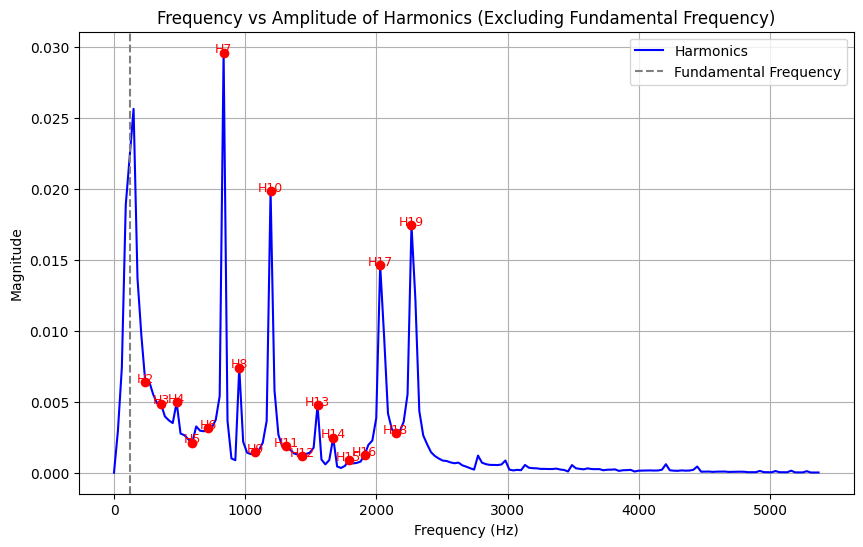

Plotting for Non-Ideal Motor - Core fault-2...


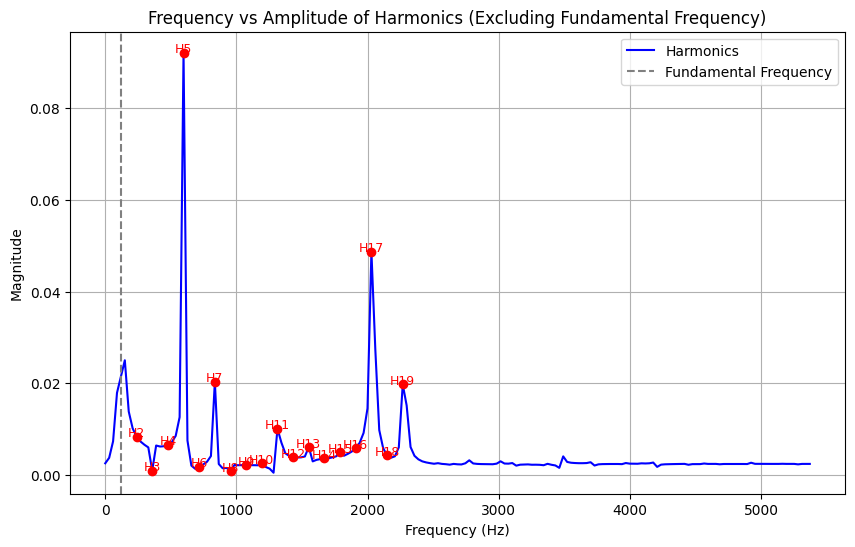

Plotting for Non-Ideal Motor - Extreme low temperature...


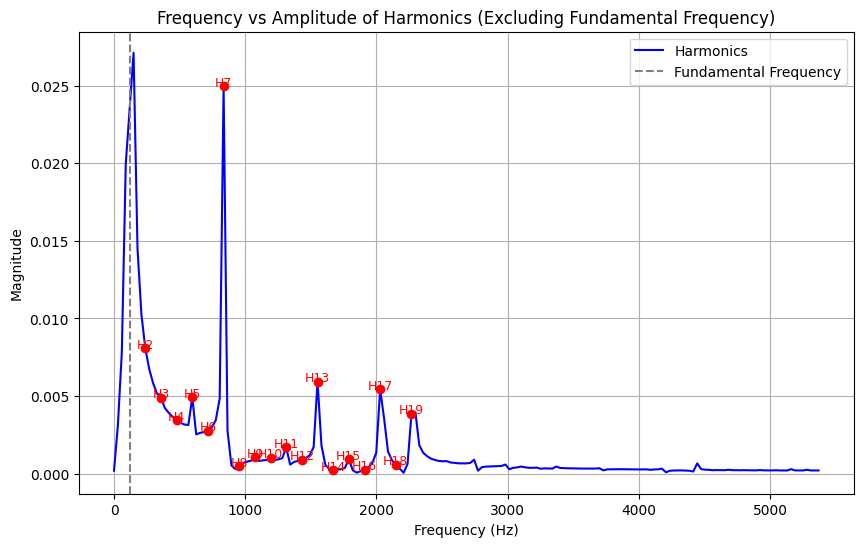

Plotting for Non-Ideal Motor - Extreme high temperature...


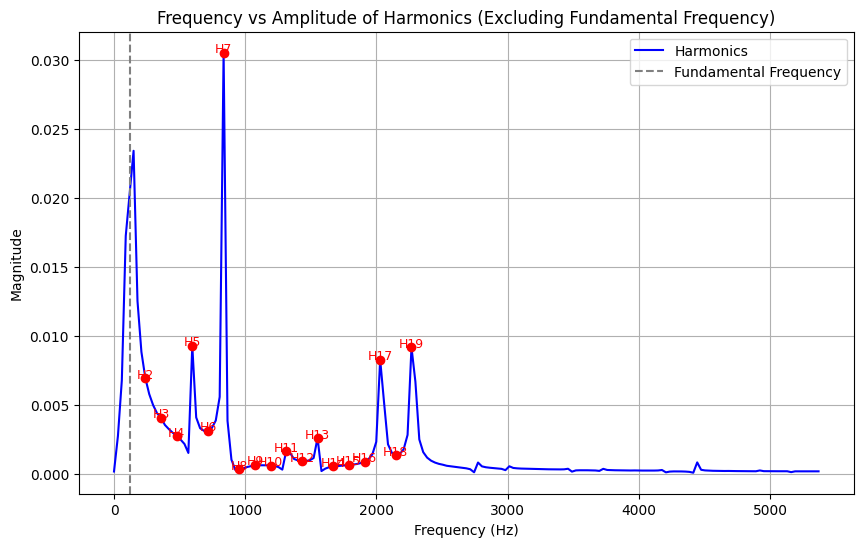

In [122]:
import matplotlib.pyplot as plt
import random

def plot_harmonics(harmonic_data, fundamental_frequency_idx):
    plt.figure(figsize=(10, 6))

    # Frequency and magnitude data
    freq = harmonic_data['Frequency (Hz)']
    mag = harmonic_data['Magnitude']

    # Filter out the fundamental frequency
    fundamental_frequency = freq[fundamental_frequency_idx]
    harmonic_data_filtered = harmonic_data.drop(fundamental_frequency_idx)

    # Plot the filtered harmonic data
    plt.plot(harmonic_data_filtered['Frequency (Hz)'], harmonic_data_filtered['Magnitude'], label='Harmonics', color='blue')

    # Mark all harmonic levels
    for level in range(1, 20):
        harmonic_freq = fundamental_frequency * level
        if harmonic_freq in harmonic_data_filtered['Frequency (Hz)'].values:
            harmonic_amplitude = harmonic_data_filtered.loc[harmonic_data_filtered['Frequency (Hz)'] == harmonic_freq, 'Magnitude'].values[0]
            plt.plot(harmonic_freq, harmonic_amplitude, 'ro')  # Mark harmonics in red
            plt.text(harmonic_freq, harmonic_amplitude, f'H{level}', fontsize=9, color='red', ha='center')

    # Plot labels and title
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency vs Amplitude of Harmonics (Excluding Fundamental Frequency)')
    plt.axvline(x=fundamental_frequency, color='gray', linestyle='--', label='Fundamental Frequency')  # Optional line for fundamental frequency
    plt.legend()
    plt.grid(True)
    plt.show()

# Example to use the plot function with the results obtained
def main():
    phase = int(input("Enter the phase (1, 2, or 3): "))

    # Calculate harmonics for plotting
    results = calculate_harmonics_for_plotting(ideals, nonIdeals, phase)

    # Plot each motor's harmonic data
    for result in results:
        motor_name = result['Motor Type']
        sheet_name = result['Sheet Name']
        harmonic_data = result['Harmonic Data']
        fundamental_frequency_idx = result['Fundamental Frequency Index']

        print(f"Plotting for {motor_name} Motor - {sheet_name}...")
        plot_harmonics(harmonic_data, fundamental_frequency_idx)

# Run the main function
main()


from above fig. We can concude that H1, H7, H13, H17, H19 are playing major role in variation.

Creating 2 excel file(for ideal and non-ideal motor) with multiple sheets which will include all harmonics level and data(frequency and amplitude).

In [123]:
def decompose_to_frequency(df, phase_column, sampling_rate):
    """
    Perform FFT on the signal and return the positive frequency components and corresponding magnitudes.
    """
    signal = df.iloc[:, phase_column].values
    signal = np.ascontiguousarray(signal, dtype=np.float64)

    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1 / sampling_rate)

    # Only take the positive frequencies and magnitudes
    harmonic_data = pd.DataFrame({
        'Frequency (Hz)': xf[:N // 2],
        'Magnitude': 2.0 / N * np.abs(yf[:N // 2])
    })

    return harmonic_data

# Function to create harmonic DataFrame for Ideal or Non-Ideal motor data
def create_harmonic_dataframe(motor_data, file_name):
    with pd.ExcelWriter(file_name, mode='w') as writer:
        for phase in range(1, 4):  # Phases 1, 2, 3
            harmonics_data = []
            for condition_name, df in motor_data.items():
                sampling_rate = calculate_sampling_rate(df)
                harmonic_data = decompose_to_frequency(df, phase, sampling_rate)
                fundamental_freq = harmonic_data.loc[harmonic_data['Magnitude'].idxmax(), 'Frequency (Hz)']

                # Gather harmonic amplitudes for 1st to 19th harmonics
                harmonics_dict = {'Condition Name': condition_name}
                harmonics_dict.update({f'H{level} Amplitude': harmonic_data.loc[
                    (np.abs(harmonic_data['Frequency (Hz)'] - fundamental_freq * level)).idxmin(), 'Magnitude']
                    for level in range(1, 20)})
                harmonics_data.append(harmonics_dict)

            # Create DataFrame, and write to sheet
            harmonics_df = pd.DataFrame(harmonics_data)
            harmonics_df.to_excel(writer, sheet_name=f'Phase {phase}', index=False)


def create_harmonics_excel(ideals, nonIdeals):
    create_harmonic_dataframe(ideals, ideal_harmonic_data_path)
    create_harmonic_dataframe(nonIdeals, non_ideal_harmonic_data_path)

create_harmonics_excel(ideals, nonIdeals)



Data Preparation

First, we'll ensure that the data (harmonic amplitudes) is properly organized. We'll load the dataset of harmonics and prepare it for training a classification model.

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split


ideal_sheets = pd.read_excel(ideal_harmonic_data_path, sheet_name=None)
non_ideal_sheets = pd.read_excel(non_ideal_harmonic_data_path, sheet_name=None)


ideal_harmonics_df = pd.concat(ideal_sheets.values(), ignore_index=True)
non_ideal_harmonics_df = pd.concat(non_ideal_sheets.values(), ignore_index=True)

ideal_harmonics_df['Target'] = 1
non_ideal_harmonics_df['Target'] = 0

combined_df = pd.concat([ideal_harmonics_df, non_ideal_harmonics_df], ignore_index=True)

X = combined_df.drop(columns=['Target'])
y = combined_df['Target']

In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Condition Name  51 non-null     object 
 1   H1 Amplitude    51 non-null     float64
 2   H2 Amplitude    51 non-null     float64
 3   H3 Amplitude    51 non-null     float64
 4   H4 Amplitude    51 non-null     float64
 5   H5 Amplitude    51 non-null     float64
 6   H6 Amplitude    51 non-null     float64
 7   H7 Amplitude    51 non-null     float64
 8   H8 Amplitude    51 non-null     float64
 9   H9 Amplitude    51 non-null     float64
 10  H10 Amplitude   51 non-null     float64
 11  H11 Amplitude   51 non-null     float64
 12  H12 Amplitude   51 non-null     float64
 13  H13 Amplitude   51 non-null     float64
 14  H14 Amplitude   51 non-null     float64
 15  H15 Amplitude   51 non-null     float64
 16  H16 Amplitude   51 non-null     float64
 17  H17 Amplitude   51 non-null     float

Feature Analysis:
We can analyze which harmonics have the most impact on classification. One method is to use a correlation matrix or perform PCA to reduce dimensionality:

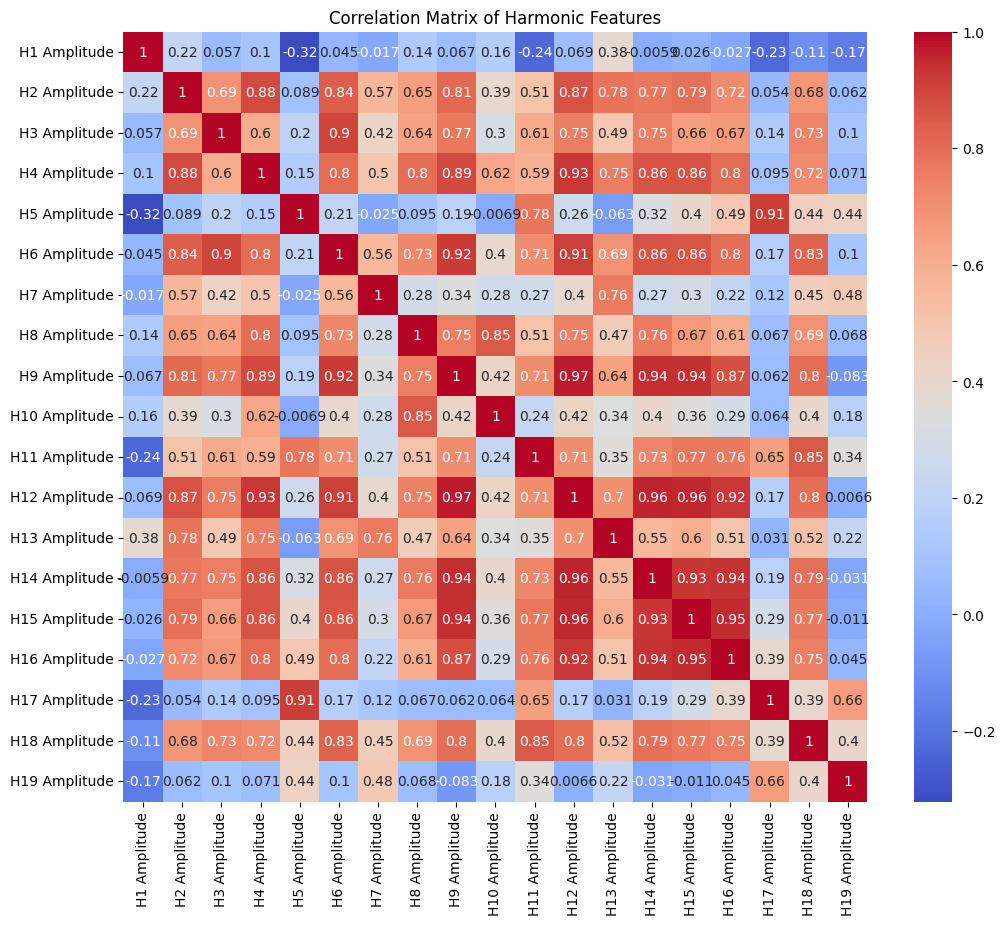

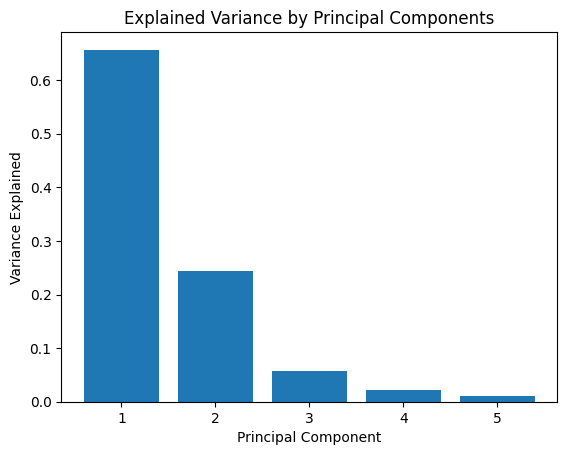

Top 5 Features for each Principal Component:
PC1: ['H1 Amplitude', 'H5 Amplitude', 'H17 Amplitude', 'H19 Amplitude', 'H11 Amplitude']
PC2: ['H5 Amplitude', 'H17 Amplitude', 'H1 Amplitude', 'H19 Amplitude', 'H11 Amplitude']
PC3: ['H7 Amplitude', 'H19 Amplitude', 'H13 Amplitude', 'H10 Amplitude', 'H5 Amplitude']
PC4: ['H19 Amplitude', 'H17 Amplitude', 'H14 Amplitude', 'H9 Amplitude', 'H11 Amplitude']
PC5: ['H10 Amplitude', 'H7 Amplitude', 'H19 Amplitude', 'H8 Amplitude', 'H17 Amplitude']


In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

numeric_X = X.select_dtypes(include=[float, int])
corr_matrix = numeric_X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Harmonic Features")
plt.show()

pca = PCA(n_components=5)
X_pca = pca.fit_transform(numeric_X)

plt.bar(range(1, 6), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(5)], index=numeric_X.columns)

# Display the top features contributing to each principal component
top_features_per_component = {}
for i in range(5):
    top_features = loadings[f'PC{i+1}'].abs().sort_values(ascending=False).head(5).index.tolist()
    top_features_per_component[f'PC{i+1}'] = top_features

print("Top 5 Features for each Principal Component:")
for component, features in top_features_per_component.items():
    print(f"{component}: {features}")


In the above bar chart, we can see top 5 principal components contribution percentage. It is visible that after top 4 or 5 principal components %age contribution is so less to be ignoreed.


PCA is an unsupervised technique. It only considers the variance within the features but does not take into account the relationship between the features and the target variable. This means that while PCA might reduce dimensions effectively, it doesn't necessarily select the features that are most useful for classification.
Random Forest feature selection is supervised and selects features based on their relevance to the target variable, which is why it often results in better classification performance compared to PCA.

In some cases, PCA might discard information that's crucial for classification , leading to lower accuracy.
By combining PCA and Random Forest, We reduce noise and correlations among features. This can help Random Forest focus on the most informative components, leading to improved generalization and better accuracy.

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Function to predict the main class using PCA and Random Forest
def predict_main_class(X, Y, n_pca_components=5, test_size=0.2, random_state=42):
    """
    This function performs PCA on the input features, selects important features using Random Forest,
    and predicts the main class.

    Parameters:
    - X: The feature set (excluding the target 'Condition Name' column).
    - Y: The target labels (main class).
    - n_pca_components: Number of PCA components to keep.
    - test_size: Proportion of the data to be used as the test set.
    - random_state: Random seed for reproducibility.

    Returns:
    - accuracy: Accuracy of the model on the test set.
    - rf_model: The trained Random Forest model.
    """

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=n_pca_components)
    X_pca = pca.fit_transform(X_scaled)


    rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rf.fit(X_pca, Y)

    importances = rf.feature_importances_
    threshold = np.mean(importances)  # Use the mean importance as a threshold
    important_indices = np.where(importances >= threshold)[0]

    # Select the important PCA components
    X_important_pca = X_pca[:, important_indices]


    X_train, X_test, Y_train, Y_test = train_test_split(X_important_pca, y, test_size=test_size, random_state=random_state)


    rf_important = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rf_important.fit(X_train, Y_train)


    Y_pred_important = rf_important.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred_important)
    print(f"Accuracy after PCA and Random Forest Feature Selection: {accuracy}")

    return accuracy, rf_important

X_numeric = X.drop(columns=['Condition Name'])
accuracy, rf_model = predict_main_class(X_numeric, y)


Accuracy after PCA and Random Forest Feature Selection: 0.9090909090909091


In [128]:
from sklearn.model_selection import cross_val_score

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_numeric)


clf_cross_val_score=cross_val_score(rf_model, X_numeric, y, cv=5)
clf_cross_val_score.mean(), clf_cross_val_score

(0.7127272727272727,
 array([0.36363636, 0.7       , 0.7       , 0.8       , 1.        ]))

**Sub-Class Prediction**

In [130]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X_numeric = X.drop(columns=['Condition Name'])
Y_subclass = X['Condition Name']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

Y_subclass = Y_subclass.replace({'Type-1 variation B': 'Type-1 error',
                                 'Type-1 variation A': 'Type-1 error',
                                 'Type-1 variation C': 'Type-1 error',
                                 'Type-1 variation D': 'Type-1 error',
                                 'Type-2 variation A': 'Type-2 error',
                                 'Type-2 variation D': 'Type-2 error',
                                 'Type-2 variation E': 'Type-2 error',
                                 'Core fault-1': 'Core fault',
                                 'Core fault-2': 'Core fault'
                                 })


#pca = PCA(n_components=7)
#X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_subclass, test_size=0.15, random_state=42)


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM model: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))




Accuracy of SVM model: 0.625

Classification Report:
                          precision    recall  f1-score   support

Extreme high temperature       1.00      1.00      1.00         1
         Low temperature       1.00      0.00      0.00         1
            Type-1 error       0.50      1.00      0.67         3
            Type-2 error       1.00      0.50      0.67         2
          polarity issue       1.00      0.00      0.00         1

                accuracy                           0.62         8
               macro avg       0.90      0.50      0.47         8
            weighted avg       0.81      0.62      0.54         8



In [131]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm_model, X_scaled, Y_subclass, cv=5)


cv_scores.mean(), cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


(0.6290909090909091,
 array([0.54545455, 0.6       , 0.7       , 0.6       , 0.7       ]))